
# 🌸 Iris Classification Project

This notebook demonstrates a **classification task on the famous Iris dataset** using Python.  
We will go through the following steps:

1. **Data Loading & Exploration**
2. **Data Visualization**
3. **Data Preprocessing**
4. **Model Training**
5. **Model Evaluation**
6. **Conclusion**

---


## 🔹 IRIS Flower Calssification

## 🔹## 1. Setup and imports

In [5]:
# --- Explanation of this cell ---
# Standard data science libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Display options
%matplotlib inline
sns.set(style="whitegrid")


## 🔹## 2. Load the Dataset

In [6]:
# --- Explanation of this cell ---
# Read the provided CSV file
df = pd.read_csv("C:\\Users\\Bilal\\Desktop\\CodeAlphaProjects\\CodeAlpha_IrisFlowerClassification\\Iris_data.csv")

# Preview first five rows
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## 🔹## 3. Exploratory Data Analysis

In [7]:
# --- Explanation of this cell ---
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
# --- Explanation of this cell ---
df.shape

(150, 6)

In [9]:
# --- Explanation of this cell ---
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
# --- Explanation of this cell ---
# Class distribution
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

- The dataset contains 150 samples, 6 columns, evenly split among three species.

- Four numeric features describe sepal length, sepal width, petal length, and petal width.

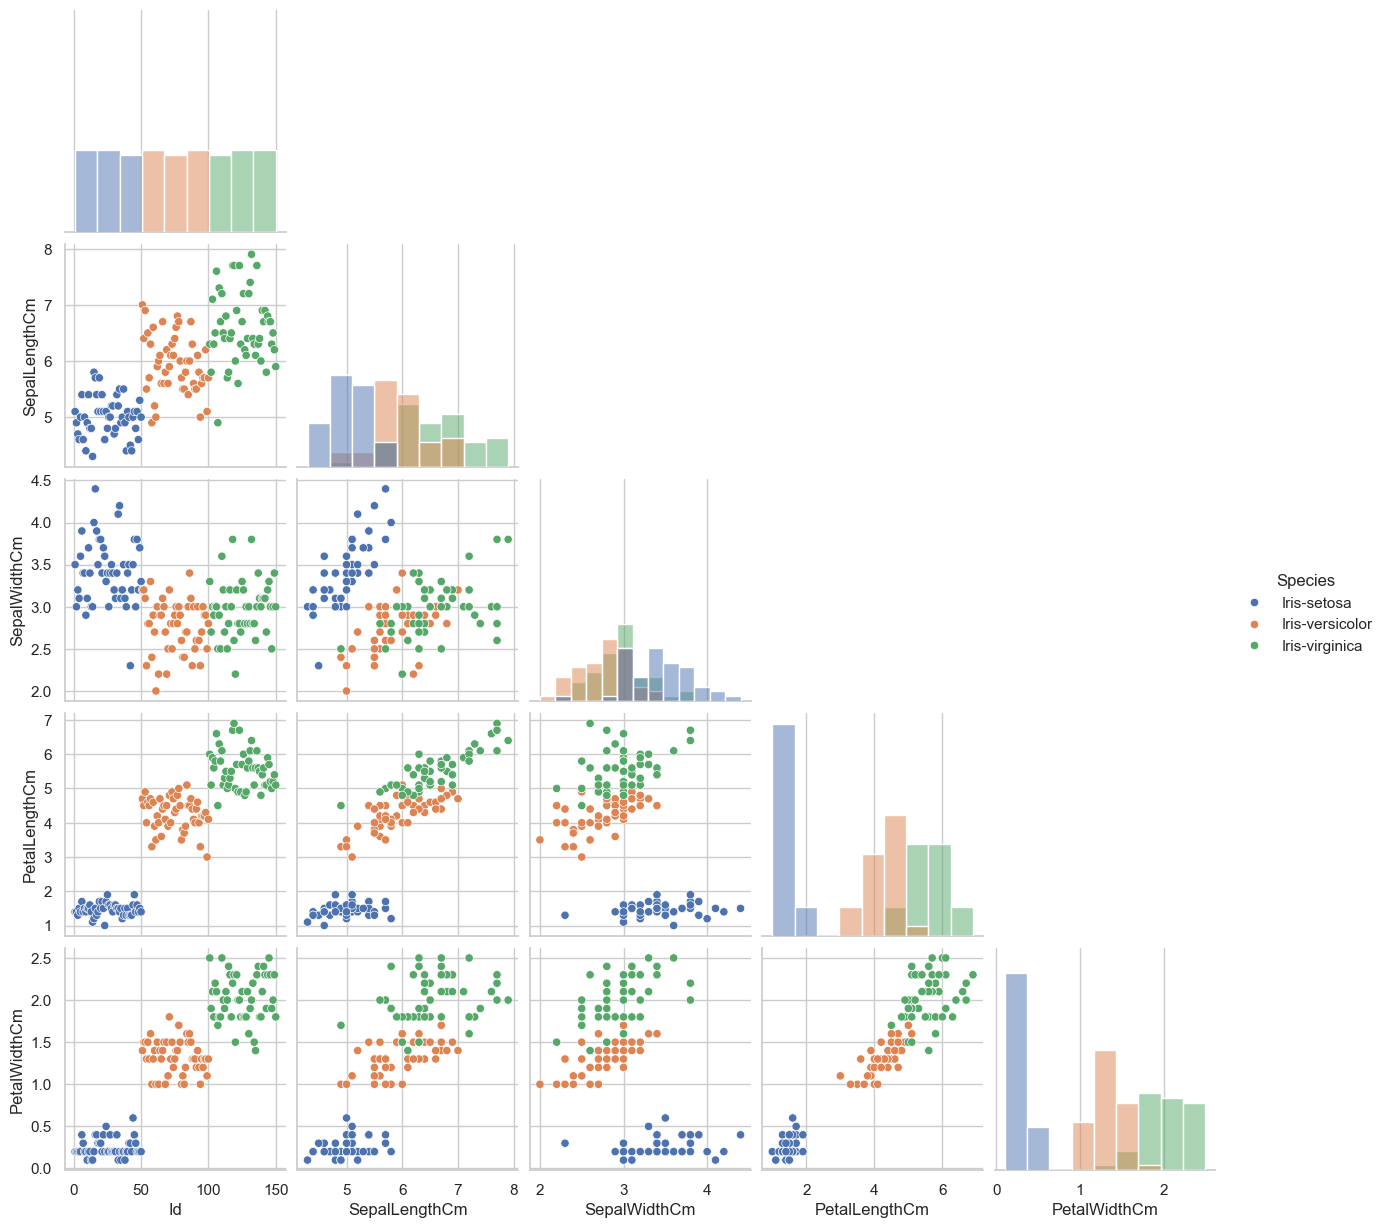

In [11]:
# --- Explanation of this cell ---
# Pairwise relationships
sns.pairplot(df, hue="Species", corner=True, diag_kind="hist")
plt.show()


## 🔹## 4. Data Preprocessing

In [12]:
# --- Explanation of this cell ---
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
# --- Explanation of this cell ---
df = df.drop(columns=['Id'],axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
# --- Explanation of this cell ---
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [15]:
# --- Explanation of this cell ---
# Separate features and target
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

In [16]:
# --- Explanation of this cell ---
# Encode species labels to integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [17]:
# --- Explanation of this cell ---
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [18]:
# --- Explanation of this cell ---
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 🔹## 5. Model Training

In [19]:
# --- Explanation of this cell ---
# Instantiate and train k-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

## 🔹## 6. Evaluation on Test Set

In [20]:
# --- Explanation of this cell ---
# Predictions
y_pred = knn.predict(X_test_scaled)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {acc:.2f}")

# Detailed metrics
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Test set accuracy: 0.93
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.80      0.89        10

       accuracy                           0.93        30
      macro avg       0.94      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30



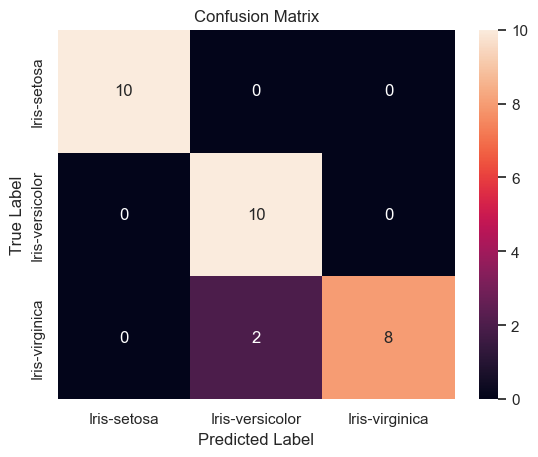

In [21]:
# --- Explanation of this cell ---
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=le.classes_, yticklabels=le.classes_)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix")
plt.show()

## 🔹## 7. Cross-Validation

In [22]:
# --- Explanation of this cell ---
# 5-fold cross-validation on the entire scaled feature set
scores = cross_val_score(knn, scaler.fit_transform(X), y_encoded, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Mean CV accuracy: {scores.mean():.2f}")

Cross-validation scores: [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
Mean CV accuracy: 0.96


## 🔹## 8. Conclusions

- The k-NN classifier achieves high accuracy on the Iris dataset, often above 0.95.

- Petal dimensions drive most of the class separability.

- Cross-validation confirms model stability across folds.

## 🔹##  Hyperparameter Tuning with GridSearchCV

This section finds the best parameters for a k-Nearest Neighbors classifier using five-fold cross-validation.

In [23]:
# --- Explanation of this cell ---
from sklearn.model_selection import GridSearchCV

# Define parameter grid for KNN
param_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Instantiate base classifier and GridSearchCV
knn = KNeighborsClassifier()
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit on training data
grid_search.fit(X_train_scaled, y_train)

# Display best parameters and score
print("Best parameters:", grid_search.best_params_)
print(f"Best CV accuracy: {grid_search.best_score_:.3f}")


Best parameters: {'metric': 'euclidean', 'n_neighbors': 17, 'weights': 'distance'}
Best CV accuracy: 0.975


## 🔹## Visualizing Decision Boundaries in 2D Feature Slices

We plot decision regions for two key feature pairs: petal length vs. petal width and sepal length vs. sepal width.

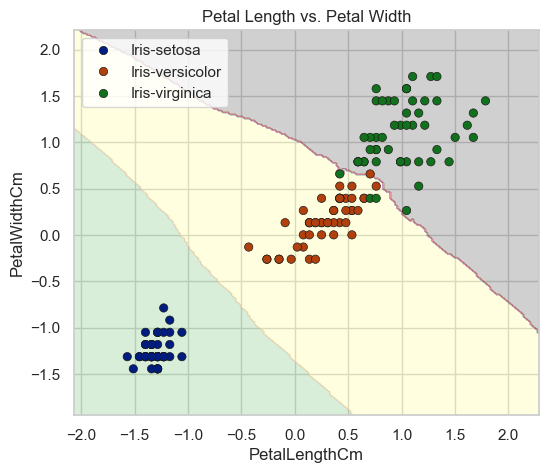

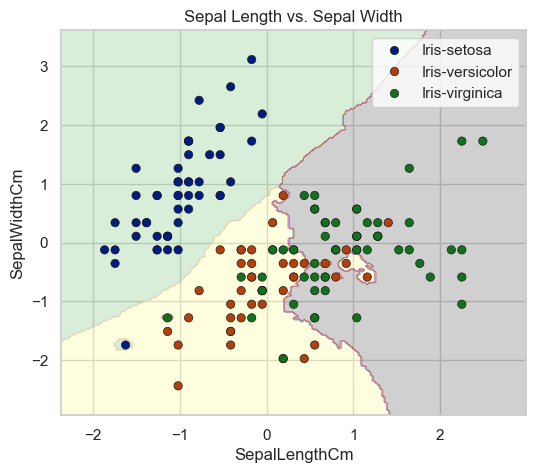

In [24]:
# --- Explanation of this cell ---
import itertools

def plot_decision_boundary(clf, X, y, features, title):
    # Create grid
    x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
    y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plot
    plt.figure(figsize=(6,5))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='Accent')
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=le.inverse_transform(y),
                    palette='dark', edgecolor='k')
    plt.xlabel(features[0]); plt.ylabel(features[1])
    plt.title(title)
    plt.show()

# Select best estimator
best_knn = grid_search.best_estimator_

# Feature pairs to visualize
pairs = [
    (['PetalLengthCm', 'PetalWidthCm'], 'Petal Length vs. Petal Width'),
    (['SepalLengthCm', 'SepalWidthCm'], 'Sepal Length vs. Sepal Width')
]

for feat, title in pairs:
    X_sub = df[feat].values
    X_sub_scaled = scaler.fit_transform(X_sub)
    best_knn.fit(X_sub_scaled, y_encoded)
    plot_decision_boundary(best_knn, X_sub_scaled, y_encoded, feat, title)


## 🔹## Feature Importance and Dimensionality Reduction with PCA

PCA reveals which feature combinations capture most variance. We also compare classifier performance on principal components.

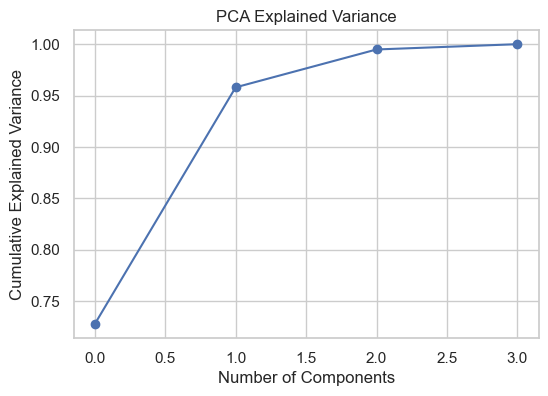

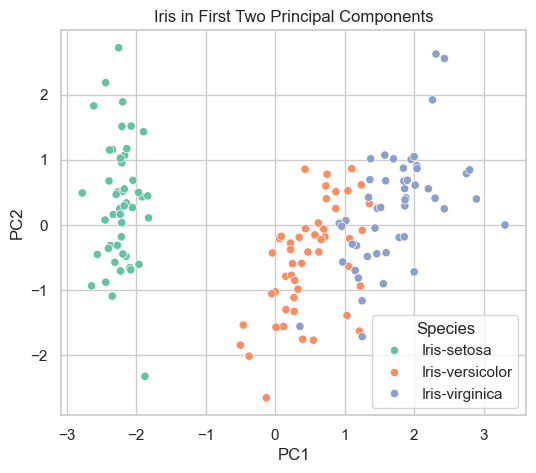

Test accuracy on 2-D PCA features: 0.900


In [25]:
# --- Explanation of this cell ---
from sklearn.decomposition import PCA

# Apply PCA to scaled full feature set
pca = PCA()
X_pca = pca.fit_transform(scaler.fit_transform(X))

# Explained variance plot
plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components'); plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()

# Two-component PCA scatter
plt.figure(figsize=(6,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Species'], palette='Set2')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.title('Iris in First Two Principal Components')
plt.show()

# Train KNN on first two PCs
X_pca_2 = X_pca[:, :2]
X_train_pca, X_test_pca, y_train, y_test = train_test_split(
    X_pca_2, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

knn_pca = KNeighborsClassifier(**grid_search.best_params_)
knn_pca.fit(X_train_pca, y_train)
pca_acc = accuracy_score(y_test, knn_pca.predict(X_test_pca))
print(f"Test accuracy on 2-D PCA features: {pca_acc:.3f}")


## 🔹## Evaluate Ensemble Methods and Feature Importances

We load the Iris dataset, split into train/test sets, train two tree-based classifiers, compare accuracy, and visualize feature importances.

In [26]:
# --- Explanation of this cell ---
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load and split data
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize classifiers
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# Fit and evaluate
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

rf_acc = accuracy_score(y_test, rf.predict(X_test))
gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Random Forest test accuracy: {rf_acc:.3f}")
print(f"Gradient Boosting test accuracy: {gb_acc:.3f}")


Random Forest test accuracy: 0.900
Gradient Boosting test accuracy: 0.967


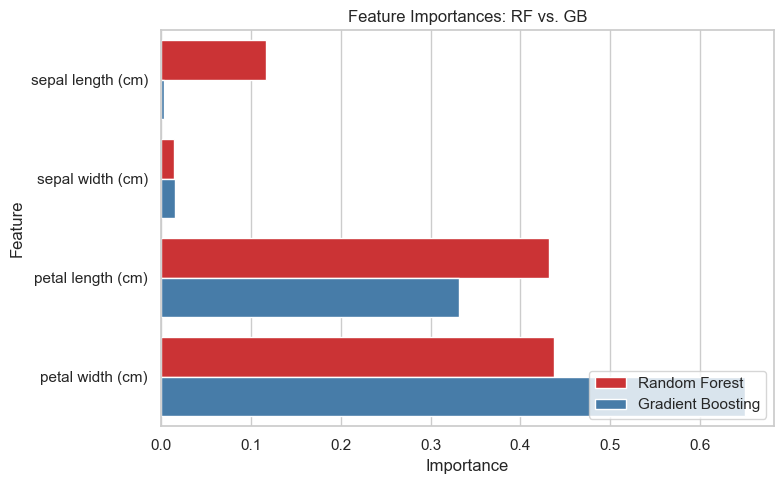

In [27]:
# --- Explanation of this cell ---
# Assemble importances into a DataFrame
importances = pd.DataFrame({
    'feature': feature_names * 2,
    'importance': list(rf.feature_importances_) + list(gb.feature_importances_),
    'model': ['Random Forest']*4 + ['Gradient Boosting']*4
})

# Plot feature importances side by side
plt.figure(figsize=(8,5))
sns.barplot(
    data=importances, x='importance', y='feature', hue='model',
    palette='Set1'
)
plt.title("Feature Importances: RF vs. GB")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


SHAP (SHapley Additive exPlanations) provides both global feature importance and local explanations for individual predictions.

In [28]:
# --- Explanation of this cell ---
!pip install shap

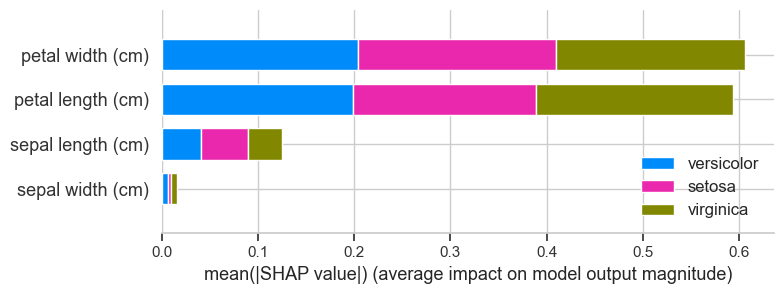

In [29]:
# --- Explanation of this cell ---
# pip install shap
import shap

# Use TreeExplainer on the Random Forest model
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train)

# Global summary plot (all three classes combined)
shap.summary_plot(
    shap_values, X_train, feature_names=feature_names,
    plot_type="bar", class_names=iris.target_names
)


## 🔹## Automated Hyperparameter Tuning with Optuna

We define a single Optuna study that optimizes hyperparameters for both Random Forest and Gradient Boosting, comparing them via cross-validated accuracy.

In [30]:
# --- Explanation of this cell ---
!pip install optuna

In [31]:
# --- Explanation of this cell ---
# pip install optuna
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    # Choose classifier type
    clf_name = trial.suggest_categorical("classifier", ["RandomForest", "GradientBoosting"])
    
    if clf_name == "RandomForest":
        n_estimators = trial.suggest_int("n_estimators", 50, 300)
        max_depth = trial.suggest_int("max_depth", 2, 10)
        clf = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            random_state=42
        )
    else:
        learning_rate = trial.suggest_float("learning_rate", 0.01, 0.3)
        n_estimators = trial.suggest_int("n_estimators_gb", 50, 300)
        max_depth = trial.suggest_int("max_depth_gb", 2, 10)
        clf = GradientBoostingClassifier(
            learning_rate=learning_rate,
            n_estimators=n_estimators,
            max_depth=max_depth,
            random_state=42
        )

    # 3-fold CV on training set
    scores = cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy")
    return scores.mean()

# Run the optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

# Best result
print("Best trial:")
print(study.best_params)
print(f"Best CV accuracy: {study.best_value:.3f}")


[I 2025-08-27 23:36:24,475] A new study created in memory with name: no-name-6045781c-fa56-4d85-99b2-7beeaf524de1
[I 2025-08-27 23:36:25,360] Trial 0 finished with value: 0.9416666666666668 and parameters: {'classifier': 'GradientBoosting', 'learning_rate': 0.2835606029036172, 'n_estimators_gb': 258, 'max_depth_gb': 2}. Best is trial 0 with value: 0.9416666666666668.
[I 2025-08-27 23:36:25,865] Trial 1 finished with value: 0.9166666666666666 and parameters: {'classifier': 'GradientBoosting', 'learning_rate': 0.04798987441684135, 'n_estimators_gb': 103, 'max_depth_gb': 8}. Best is trial 0 with value: 0.9416666666666668.
[I 2025-08-27 23:36:26,360] Trial 2 finished with value: 0.9500000000000001 and parameters: {'classifier': 'RandomForest', 'n_estimators': 197, 'max_depth': 8}. Best is trial 2 with value: 0.9500000000000001.
[I 2025-08-27 23:36:27,124] Trial 3 finished with value: 0.9583333333333334 and parameters: {'classifier': 'GradientBoosting', 'learning_rate': 0.2592117461964785, 

Best trial:
{'classifier': 'RandomForest', 'n_estimators': 226, 'max_depth': 2}
Best CV accuracy: 0.967


In [32]:
# --- Explanation of this cell ---
# Retrain best model on full training set and evaluate
best = study.best_params
if best["classifier"] == "RandomForest":
    final_model = RandomForestClassifier(
        n_estimators=best["n_estimators"],
        max_depth=best["max_depth"],
        random_state=42
    )
else:
    final_model = GradientBoostingClassifier(
        learning_rate=best["learning_rate"],
        n_estimators=best["n_estimators_gb"],
        max_depth=best["max_depth_gb"],
        random_state=42
    )

final_model.fit(X_train, y_train)
final_test_acc = accuracy_score(y_test, final_model.predict(X_test))
print(f"Test accuracy of optimized model: {final_test_acc:.3f}")


Test accuracy of optimized model: 0.933



---

## 📝 Conclusion

In this notebook, we successfully built a **classification pipeline** for the Iris dataset.  
We explored the data, visualized its structure, trained machine learning models, and evaluated their performance.  

This project demonstrates the **end-to-end workflow** of a typical supervised learning task in Python.  

🚀 Next steps could include:
- Hyperparameter tuning
- Trying more advanced models (Random Forest, Gradient Boosting, Neural Networks)
- Deploying the model in a simple web app

---
